<h1 align="center">Changes in the rate of PINCER indicators throughout the COVID-19 pandemic</h1>

Pharmacist-led information technology intervention (PINCER) is an effective way to reduce errors in prescription and medication monitoring which are responsible for a large proportion of adverse drug events. This is achieved through the monitoring of 14 PINCER indicators.

The purpose of this notebook is observe changes in adherence to each of the PINCER measures at the practice level during the pandemic. We extacted the number of unique patients meeting the criteria for each indicator and the number of recorded occurrences of each indicaotr between September 2019 and July 2021. Each month, the practice level rates for each indicator are ranked and deciles of activity are calculated. These are plotted as time series decile charts.

The 12 PINCER measures include:
* [Gastrointestinal (GI) Bleed Indicators](#gi_bleed)
    * [Age 65+, on oral NSAID without gastroprotection (GI_P3A)](#a)
    * [H/O peptic ulcer, on oral NSAID without gastroprotection (GI_P3B)](#b)
    * [H/O peptic ulcer, on OAC without gastroprotection (GI_P3C)](#c)
    * [On OAC and oral NSAID (GI_P3D)](#d)
    * [On OAC and antiplatelet without gastroprotection (GI_P3E)](#e)
    * [On aspirin and antiplatelet without gastroprotection (GI_P3F)](#f)
* [Monitoring Indicators](#monitoring)
    * [Age 75+, on ACEI or loop, no renal function/electrolytes test (MO_P13)](#ac)
    * [Methotrexate audit (MO_P15)](#me)
        * [On methotrexate without recorded full blood count (FBC)](#me_no_fbc)
        * [On methotrexate without recorded liver functon test (LFT)](#me_no_lft)
    * [On lithium without recent lithium test (MO_P17)](#li)
    * [On amiodarone without recent thyroid function test (TFT) (MO_P18)](#am)
* [Other Indicators](#other)
    * [Asthma and non-selective BB (AS_P3G)](#g)
    * [Heart failure and oral NSAID (HF_P3I)](#i)
    * [eGFR <45 and oral NSAID (KI_P3K)](#k)
    
There are also a set of [composite indicators](#composites) which indicate the number of people with 1 or more of each of the broad measure categories:
* [GI Bleed Composite Indicator](#composite_gi_bleed)
* [Monitoring Composite Indicator](#composite_monitoring)
* [Other Composite Indicator](#composite_other)
* [Combined Composite Indicator](#composite_all)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpllimg
import matplotlib as mpl
import json
from IPython.display import HTML, display, Markdown
mpl.rcParams['figure.dpi']= 200

with open('../output/indicator_summary_statistics.json') as f:
        summary = json.load(f)["summary"]

def show_summary(indicator):
    display(
    Markdown(f"Percentage of practices with at least one potentially hazardous prescribing event throughout the entire study period: {summary[indicator]['percent_practice']}%"),
    Markdown(f"Number of unique patients satisfying the indicator throughout the entire study period: {summary[indicator]['patients']:,}"),
    Markdown(f"Number of potentially hazardous prescribing events throughout the study period: {int(summary[indicator]['events']):,}")
       )
        
def show_image(path):

    img=mpllimg.imread(path)
    img_plot = plt.imshow(img)
    plt.axis('off')
    plt.show()

<a id="gi_bleed"></a>
## Gastrointestinal (GI) Bleed Indicators


<a id="a"></a>
### Age 65+, on oral NSAID without gastroprotection (GI_P3A)

Prescription of an oral NSAID in the previous 3 months to patients aged 65 or above who have been co-prescribed an ulcer healing drug in the previous 3 months.  

In [3]:
show_summary('a')

Percentage of practices with at least one potentially hazardous prescribing event throughout the entire study period: 100.0%

Number of unique patients satisfying the indicator throughout the entire study period: 6,935

Number of potentially hazardous prescribing events throughout the study period: 11,500

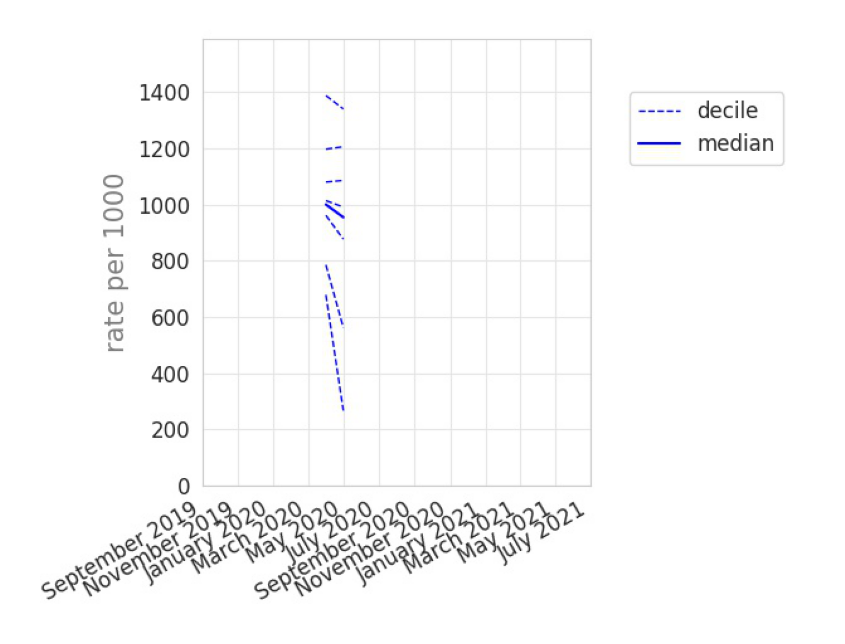

In [35]:
show_image("../output/figures/plot_a.jpeg")

<a id="b"></a>
### H/O peptic ulcer, on oral NSAID without gastroprotection (GI_P3B)

Prescription of an oral NSAID in the previous 3 months to patients with a history of peptic ulceration/gastric bleed.

In [ ]:
show_summary('b')

In [ ]:
show_image("../output/figures/plot_b.jpeg")



<a id="c"></a>
### H/O peptic ulcer, on OAC without gastroprotection (GI_P3C)

Prescription of an aniplatelet drug in the previous 3 months in patients with a history of peptic ulceration/gatric bleed.

In [ ]:
show_summary('c')

In [ ]:
show_image("../output/figures/plot_c.jpeg")

<a id="d"></a>
### On OAC and oral NSAID (GI_P3D)

Prescription of warfarin or a DOAC in the previous 3 months and a preascription of an oral NSAID in the previous 3 months.

In [ ]:
show_summary('d')

In [ ]:
show_image("../output/figures/plot_d.jpeg")

<a id="e"></a>
### On OAC and antiplatelet without gastroprotection (GI_P3E)

Prescription of warfarin or a DOAC in combination with an antiplatelet drug in the previous 3 months without co-prescription of an ulcer-healing drug.

Note: "In combination" is defined as a co-prescription within 28 days of each other.


In [ ]:
show_summary('e')

In [ ]:
show_image("../output/figures/plot_e.jpeg")

<a id="f"></a>
### On aspirin and antiplatelet without gastroprotection (GI_P3F)

Prescription of aspirin in combination with another antiplatelet drug in the previous 3 months without co-prescription of an ulcer-healing drug.

Note: "In combination" is defined as a co-prescription within 28 days of each other.

In [ ]:
show_summary('f')

In [ ]:
show_image("../output/figures/plot_f.jpeg")

<a id="monitoring"></a>
## Monitoring Indicators

<a id="ac"></a>
### Age 75+, on ACEI or loop, no renal function/electrolytes test (MO_P13)

Absence of a computer-recorded check of renal function or electrolytes in the previous 15 months in patients aged 75 or over who have been prescripted an ACEi of loop diuretic in the previous 6 months.

In [ ]:
show_summary('ac')

In [ ]:
show_image("../output/figures/plot_ac.jpeg")

<a id="me"></a>
### Methotrexate audit (MO_P15)

<a id="me_no_fbc"></a>
#### On methotrexate without recorded full blood count

Absence of a recorded full blood count in the previous 3 months in patients who have been receiving a methotrexate prescription for at least 3 months.

In [ ]:
show_summary('me_no_fbc')

In [ ]:
show_image("../output/figures/plot_me_no_fbc.jpeg")

<a id="me_no_lft"></a>
#### On methotrexate without recorded liver function test

Absence of a recorded liver function test in the previous 3 months in patients who have been receiving a methotrexate prescription for at least 3 months.

In [ ]:
show_summary('me_no_lft')

In [ ]:
show_image("../output/figures/plot_me_no_lft.jpeg")

<a id="li"></a>
### On lithium without recent lithium test (MO_P17)

Absence of a recorded check of lithium concentration in the previous 3 months in patients who have been receiving a lithium prescription for at least 3 months.

In [ ]:
show_summary('li')

In [ ]:
show_image("../output/figures/plot_li.jpeg")

<a id="am"></a>
### On amiodarone without recent thyroid function test (MO_P18)

Absence of a recorded thyroid function test in the previous 6 months in patients who have been receiving a lithium prescription for at least 6 months.

In [ ]:
show_summary('am')

In [ ]:
show_image("../output/figures/plot_am.jpeg")

<a id="other"></a>
## Other Indicators


<a id="g"></a>
### Asthma and non-selective BB (AS_P3G)

Prescription of a non-selective beta-blocker in the previous 3 months in patients with a history of asthma.

Note: History of asthma is defined as patients with a recorded code for asthma without a more recent asthma resolved code.

In [ ]:
show_summary('g')

In [ ]:
show_image("../output/figures/plot_g.jpeg")

<a id="i"></a>
### Heart failure and oral NSAID (HF_P3I)

Prescription of an oral NSAID in the previous 3 months in patients with heart failure.

In [ ]:
show_summary('i')

In [ ]:
show_image("../output/figures/plot_i.jpeg")

<a id="k"></a>
### eGFR <45 and oral NSAID (KI_P3K)

Prescription of an oral NSAID in the previous 3 months to patients with an eGFR < 45.

In [ ]:
show_summary('k')

In [ ]:
show_image("../output/figures/plot_k.jpeg")

<a id="composites"></a>
## Composite Indicators

<a id="composite_gi_bleed"></a>
### GI Bleed Composite Indicator

The number of patients that fall into 1, 2, 3, 4, 5, or all 6 GI bleed indicators.

Note: Where the number of patients that fall into a given number of indicators they are combined.

In [ ]:
show_image("../output/figures/plot_gi_bleed_composite.jpeg")

<a id="composite_monitoring"></a>
### Monitoring Composite Indicator

The number of patients that fall into 1, 2, or all 3 of the monitoring indicators.

In [ ]:
show_image("../output/figures/plot_monitoring_composite.jpeg")

<a id="composite_other"></a>
### Other Composite Indicator

The number of patients that fall into 1, 2, or all 3 of the "other" indicators.

In [ ]:
show_image("../output/figures/plot_other_prescribing_composite.jpeg")

<a id="composite_all"></a>
### Combined Composite Indicator

The number of patients that fall into 1, 2, 3, 4, 5, 6, or 7+ of any indicator.

Note: Where the number of patients that fall into a given number of indicators they are combined.

In [ ]:
show_image("../output/figures/plot_all_composite.jpeg")